## **Введение в Python**

### **Занятие 3. Практика работы с numpy и matplotlib.**

На этом занятии мы попробуем выполнить мимикрировать под работу разных отделов\
и применить Python в разных ситуациях от моделирования до отрисовки научно интересных графиков. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata

##### **Задание 1. Разминаемся. Построим линейную зависимость в шумных данных.**

В этом задании вам необходимо прочитать данные из файла, найти коэффициенты линейной регресии и построить график по примеру ниже.

Для получения данных воспользуйтесь функцией `read_data` ниже.\
Данные внутри файла представляют собой 3 1-мерных массива, содержащих координаты по осям x, y и ошибку по оси y.

Верхний график на картинке должен показывать сами точки и модельную прямую.\
Нижний график должен показывать разницу между данными и моделью, нормированную на величину ошибки в данных.

*В этой задаче нет публично доступного решения, чтобы вы точно ее проработали.\
Если есть вопросы, задавайте их на занятии или мне в телеграм [@rrousan](https://t.me/rrousan).*

![liner reg example](./3_supplementary/task1/example.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(file_path):
    x, y, y_err = np.fromfile(file_path).reshape(3, -1)
    return x, y, y_err

In [4]:
x, y, y_err = read_data('./3_supplementary/task1/data.npy')

In [5]:
x.shape

(100,)

Напишите функцию, которая вычисляет коэффициенты модели `y = a*x + b` только при помощи NumPy:

Для получения формулы вычисления параметров линейной модели загляните [сюда](https://www.mathsisfun.com/data/least-squares-regression.html).

In [6]:
a = ((len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x * x) - np.sum(x) * np.sum(x)))
print(a)
b = ((np.sum(y) - a * np.sum(x)) / len(x))
print(b)
y1 = a * x + b

3.205353207200721
2.3349470639732886


Напишите блок кода с использованием этой функции и Matplotlib, чтобы нарисовать график выше.\
Для практики постарайтесь повторить все компоненты этого графика (цвета, подписи и т.д.).

Помните, что графиков должно быть два.

<ErrorbarContainer object of 3 artists>

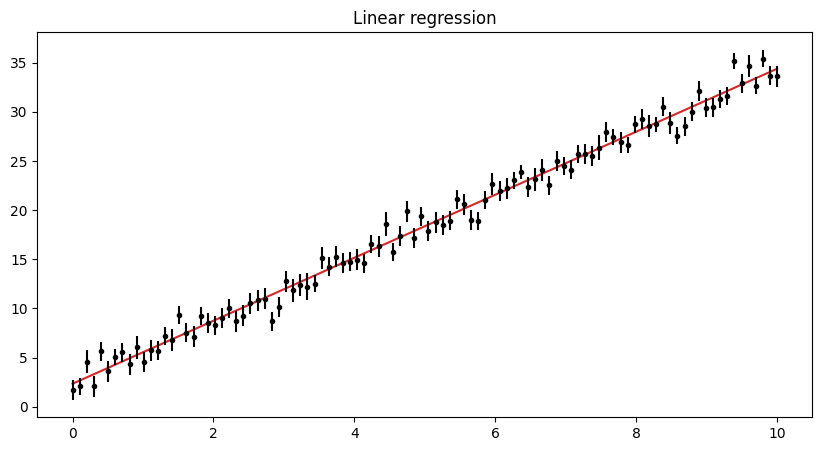

In [7]:
plt.close()

fig, ax = plt.subplots(figsize=(10, 5)) #2, 1, figsize=(7, 5)

plt.title('Linear regression')

plt.plot(x, y1, color='tab:red', )
plt.errorbar(x, y, y_err, fmt='.', color='black')

<ErrorbarContainer object of 3 artists>

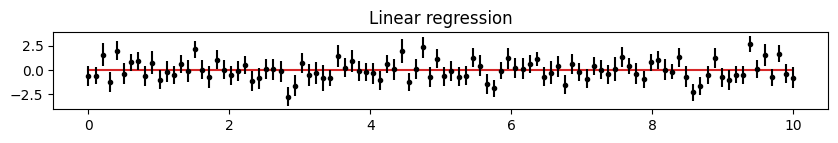

In [8]:
ynew = y - y1

fig, ax = plt.subplots(figsize=(10, 1)) #2, 1, figsize=(7, 5)

plt.title('Linear regression')

plt.plot(x, y1-y1, color='tab:red', )
plt.errorbar(x, ynew, y_err, fmt='.', color='black')

Text(0.5, 0, 'X, KeV')

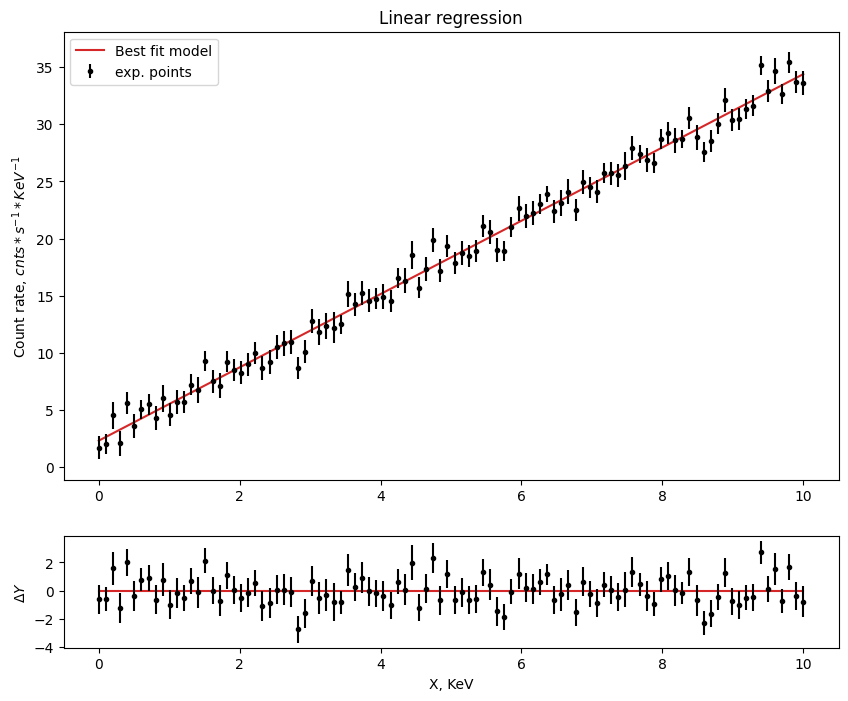

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[4,1])

ax[0].set_title("Linear regression")
ax[0].plot(x, y1, color='tab:red', label='Best fit model')
ax[0].errorbar(x, y, y_err, fmt='.', color='black', label='exp. points')
ax[0].legend()
ax[0].set_ylabel(r'Count rate, $cnts * s^{-1} * KeV^{-1}$')

ax[1].plot(x, y1-y1, color='tab:red', )
ax[1].errorbar(x, ynew, y_err, fmt='.', color='black')
ax[1].set_ylabel(r'$\Delta Y$')
ax[1].set_xlabel(r'X, KeV')



##### **Задание 2. Запускаем высотную ракету. Вспоминаем школьную кинематику.**

Первые результаты **измерения космического рентгеновского источника** **вне** Солнечной системы\
были получены при помощи высотной метеоракеты Aerobee 150. В результате был обнаружен\
первый (и самый яркий) внегалактический рентгеновский источник Sco X-1.\
Эти результаты отображены в классической работе [Риккардо Джаккони и др. (1962)](http://ui.adsabs.harvard.edu/abs/1962PhRvL...9..439G/abstract).

В этой задаче вам необходимо **вычислить траекторию движения объекта**\
(сделаем вид, что это баллистическая метеорологическая ракета), которая запущена\
со скоростью `velocity` под определенным углом `alpha` к горизонту.

Мир самый обыкновенный, значение `g` = 9.8 м/с2.

**Решение задачи необходимо провести в двух формах**:
1. Найти уравнение траектории ракеты для произвольных параметров задачи и нарисовать ее.\
    Функция `trajectory`, вывод в виде двух массивов `x` и `y`
2. Итерационно вычислять скорость и положение ракеты через небольшие промежутки времени.\
    Функция `iter_trajectoty`, вывод в виде **трех** массивов: `x`, `y`, `t`.\
    Обратите внимание, что эта функция также принимает величину шага по времени `t_step`.
3. Нарисовать на графике две полученные траектории в координатах `x, y`.

Формат представления свободный, но помните, что графики должны быть понятны читателю вашей потенциальной\
научной статьи даже, если он читает об этом в первый раз.

*Мини-подсказка.*\
Удивительно, но один из вопросов в этом задании проще и эффективнее реализовать без использования `numpy`

In [194]:
# ВВЕДЕМ КОНСТАНТУ ДЛЯ УДОБСТВА ДАЛЬНЕЙШИХ ВЫЧИСЛЕНИЙ
g_const = 9.8 #m/s
np.tan(np.pi / 4)

np.float64(0.9999999999999999)

In [235]:
def trajectory(x, alpha, velocity):
    x = np.array(x)  # Преобразование x в массив NumPy
    v_y0 = velocity * np.sin(alpha)  # Начальная скорость по Y
    v_x = velocity * np.cos(alpha)  # Начальная скорость по X
    
    # Время полета до вершины
    t = v_y0 / g_const  
    # Вершина параболы
    y_max = v_y0 * t - 0.5 * g_const * t ** 2  
    # Коэффициенты a и b
    a = -g_const / (2 * (v_x ** 2))  # Коэффициент a
    b = np.tan(alpha)  
    
    # Вычисление y для каждого x
    y = a * x**2 + b * x  
    return y

def iter_trajectory(t_step, alpha, velocity):
    v_y0 = velocity * np.sin(alpha)
    v_x = velocity * np.cos(alpha)
    
    # Время полета до вершины
    t = v_y0 / g_const  
    total_time = 2 * t  # Общее время полета
    
    count = int(total_time // t_step)  # Количество шагов
    x = np.zeros(count + 1)  # Создание массива x
    T = np.zeros(count + 1)  # Создание массива времени
    
    for i in range(count + 1):
        x[i] = v_x * t_step * i  # Расчет x для каждого шага
        T[i] = t_step * i        # Расчет времени для каждого шага
    
    y = trajectory(x, alpha, velocity)  # Вычисление y для всех x

    return x, y, T

In [236]:

print(iter_trajectory(1, np.pi / 4, 100))

(array([  0.        ,  70.71067812, 141.42135624, 212.13203436,
       282.84271247, 353.55339059, 424.26406871, 494.97474683,
       565.68542495, 636.39610307, 707.10678119, 777.81745931,
       848.52813742, 919.23881554, 989.94949366]), array([  0.        ,  65.81067812, 121.82135624, 168.03203436,
       204.44271247, 231.05339059, 247.86406871, 254.87474683,
       252.08542495, 239.49610307, 217.10678119, 184.91745931,
       142.92813742,  91.13881554,  29.54949366]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.]))


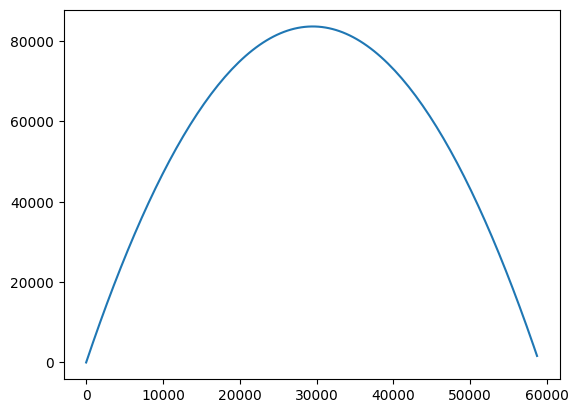

In [221]:
x, y, t = iter_trajectory(2, np.pi * 80 / 180, 1300)

plt.close()

plt.plot(x, y)

Если задача решена правильно, и шаг по времени для итерационного алгоритма подобран корректно,\
то два этих решения не должны отличаться.

Теперь найдем, **при какой минимальной скорости** при запуске ракеты **под углом 80 градусов**\
Ракета будет находиться на высоте **выше 80 км не менее 350 секунд**.\
(Именно столько снимали данные счетчики на борту Aerobee 150 в 1962 году)

**Шаги для решения задачи**:
1. Напишем функцию, которая будет принимать скорость, а возвращать время нахождения ракеты\
на высоте выше 80 км.\
Для этого используем третий массив `t` из итерационной функции.
2. Перебором с шагом в 1 м/с вычислим зависимость времени на нужной высоте от скорости ракеты\
3. Нарисуем график этой зависимости, на нем методом на ваш выбор нарисуем оптимальное значение\
скорости ракеты.

In [53]:
import numpy as np
import math

g_const = 9.8  # Ускорение свободного падения

def trajectory(x, alpha, velocity):
    x = np.array(x)  # Преобразование x в массив NumPy
    v_y0 = velocity * np.sin(alpha)  # Начальная скорость по Y
    v_x = velocity * np.cos(alpha)  # Начальная скорость по X
    
    # Время полета до вершины
    t = v_y0 / g_const  
    # Вершина параболы
    y_max = v_y0 * t - 0.5 * g_const * t ** 2  
    # Коэффициенты a и b
    a = -g_const / (2 * (v_x ** 2))  # Коэффициент a
    b = np.tan(alpha)  

    # Вычисление y для каждого x
    y = a * x**2 + b * x  
    return y

def iter_trajectory(t_step, alpha, velocity):
    v_y0 = velocity * np.sin(alpha)
    v_x = velocity * np.cos(alpha)
    
    # Время полета до вершины
    t = v_y0 / g_const  
    total_time = 2 * t  # Общее время полета
    
    count = int(total_time // t_step)  # Количество шагов
    x = np.zeros(count + 1)  # Создание массива x
    T = np.zeros(count + 1)  # Создание массива времени
    
    for i in range(count + 1):
        x[i] = v_x * t_step * i  # Расчет x для каждого шага
        T[i] = t_step * i        # Расчет времени для каждого шага
    
    y = trajectory(x, alpha, velocity)  # Вычисление y для всех x

    return x, y, T

def high_tester(velocity):
    deg = np.pi * 80 / 180
    x, y, t = iter_trajectory(1, deg, velocity)
    
    v_y0 = velocity * np.sin(deg)
    discr = v_y0 ** 2 - 2 * g_const * 80000
    

    if discr <= 0:
        return 0
    
    t1 = (-v_y0 + math.sqrt(discr)) / -g_const
    t2 = (-v_y0 - math.sqrt(discr)) / -g_const
    

    if t1 < 0 and t2 < 0:
        return 0
    
    return t2 - t1

# Пример вызова функции
result = high_tester(1) # 2157
print(result)

0


In [68]:
import numpy as np
import math

g_const = 9.8  # Ускорение свободного падения

def trajectory(x, alpha, velocity):
    x = np.array(x)
    v_y0 = velocity * np.sin(alpha)  # Начальная скорость по Y
    v_x = velocity * np.cos(alpha)  # Начальная скорость по X
    
    a = -g_const / (2 * (v_x ** 2))  # Коэффициент a
    b = np.tan(alpha)  # Коэффициент b

    # Вычисление y для каждого x
    y = a * x**2 + b * x  
    return y

def iter_trajectory(t_step, alpha, velocity):
    v_y0 = velocity * np.sin(alpha)
    v_x = velocity * np.cos(alpha)
    
    # Время полета до вершины
    t = v_y0 / g_const  
    total_time = 2 * t  # Общее время полета
    
    count = int(total_time // t_step)  # Количество шагов
    if count <= 0:
        return [], [], []  # Если время полета слишком маленькое
    
    x = np.linspace(0, v_x * total_time, count + 1)  # Создание массива x
    T = np.arange(0, total_time + t_step, t_step)  # Создание массива времени
    
    y = trajectory(x, alpha, velocity)  # Вычисление y для всех x

    return x, y, T

def high_tester(velocity):
    deg = np.pi * 80 / 180  # Угол в радианах
    x, y, t = iter_trajectory(1, deg, velocity)
    
    v_y0 = velocity * np.sin(deg)
    discr = v_y0 ** 2 - 2 * g_const * 80000


    if discr < 0:
        return 0
    
    sqrt_discr = math.sqrt(discr)
    t1 = (-v_y0 + sqrt_discr) / -g_const
    t2 = (-v_y0 - sqrt_discr) / -g_const


    if t1 < 0 and t2 < 0:
        return 0
    
    return t2 - t1  # Возвращаем максимальное значение времени

# Пример вызова функции
result = high_tester(2157)  # Попробуйте изменить значение скорости
print(result)


350.18615066384695


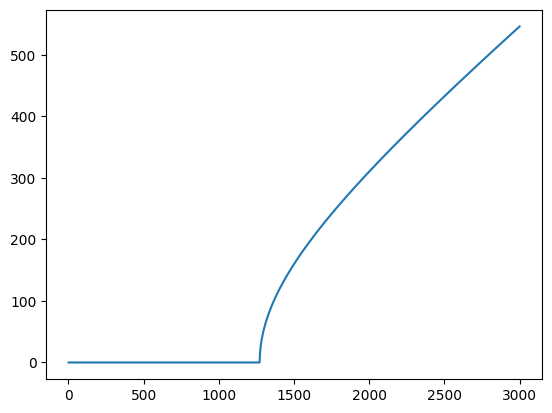

In [74]:
n = 3000 # 2157

vel = np.zeros(n)
t_time = np.zeros(n)
for i in range(n):
    vel[i] = i+1
    t_time[i] = high_tester(i+1)


plt.plot(vel, t_time)






In [86]:
def binary_search(arr, target):
    # """Находит индекс целевого рационального числа в отсортированном массиве."""            350    -  350.7
    left, right = 0, len(arr) - 1
    
    while left <= right:
        mid = (left + right) // 2
        
        if (arr[mid] - 0.01 <= target) and (arr[mid] + 0.01 >= target):
            return mid  # Возвращаем индекс, если найдено
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
            
    return -1  # Возвращаем -1, если не найдено

print(vel[binary_search(t_time, 350.186)])

2157.0


##### **Задание 3. Нарисуем пульсар Cen X-3. Приближаемся к величию.** 

Мы провели на достаточной высоте какое-то время, получили великие результаты и запустили эпоху рентгеновской\
астрофизики. Телепортируемся вперед на ~50 лет и попробуем обработать данные интересного объекта:
рентгеновского пульсара Cen X-3 (первого из открытых человечеством!).

В этом задании вам необходимо из настоящих данных рентгеновской обсерватории NuSTAR достать базовое изображение,\
базовую кривую блеска и (если останется время) радиальный профиль рентгеновского пульсара Cen X-3.


**КАК ВЫГЛЯДИТ БАЗОВОЕ ИЗОБРАЖЕНИЕ:**\
![pulsar pic](./3_supplementary/task3/image.png)

Картинка успешно взята из статьи [Томара Гунжана и др. (2021)](https://ui.adsabs.harvard.edu/abs/2021MNRAS.500.3454T/abstract)

<!-- ![spectra picture](./2_supplementary/task3/CenX3_spectrum.PNG) -->

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata

`data` - данные с телескопа по пульсару Cen X-3. Они содержат
- TIME - время регистрации фотона
- PI - величина, линейно задающая энергию зарегистрированного фотона в keV по формуле\
`E = 1.6 + 0.04 * PI`
- GRADE - статус регистрации фотона (оценка его качества)
- X - координата X зарегистрированного фотона в системе детектора телескопа
- Y - координата Y зарегистрированного фотона в системе детектора телескопа

In [155]:
data = getdata('./3_supplementary/task3/CenX3.fits')

print(data["PI"])

[104 258 873 ... 144 147 317]


Для построения графика вам необходимо самостоятельно разобраться в документации\
к Matplotlib и построить гистограмму распределения событий на изображении,\
см. функцию `plt.hist2d()`, ссылка [тут](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html).

**Что такое гистограмма?**

Гистограмма &mdash; это особый вид графиков, который разбивает события на группы и рисует число событий в каждой группе.

Таким образом мы теряем часть информации о каждом отдельном событии, но приобретаем информацию о **распределении событий по критерию**.

Ваша задача заключается в том, чтобы построить график, похожий на результат, полученный в работе Томара Гунжана.\
Здесь **нет примера** эталонного графика, вы должны представить график **по своему вкусу**.

Это задание может быть немного раздражающим, но, пожалуйста, уделите время самостоятельному чтению\
документации к коду, это поможет вам в будущем.\
Тем не менее, если возникают вопросы или непредвиденные проблемы, не стесняйтесь задавать вопросы.

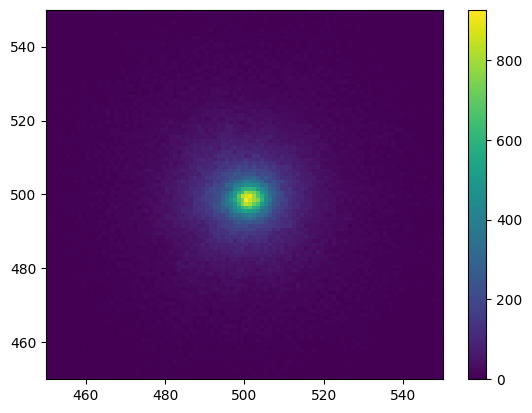

In [188]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist2d(data["X"], data["Y"], bins=100, range=[[450, 550], [450, 550]])
plt.colorbar()

fig.tight_layout()

plt.show()

In [176]:
import numpy as np


Y = np.zeros(25976)
step = 10  # Шаг для группировки

for i in range(0, len(data["PI"]), step):
    if i <= len(data["PI"]):
        for j in range(step):
            if i + j < 25975:  # Проверка на выход за границы
                Y[i] += data["PI"][i + j]
                print(Y[i])
            else:
                break

print(Y)


104.0
362.0
1235.0
1359.0
1710.0
1731.0
1873.0
2010.0
2298.0
2387.0
73.0
120.0
574.0
778.0
942.0
969.0
1350.0
1968.0
2121.0
2242.0
146.0
326.0
548.0
714.0
871.0
951.0
1334.0
1464.0
1784.0
1894.0
253.0
548.0
585.0
691.0
906.0
1153.0
1257.0
1491.0
1695.0
1865.0
143.0
305.0
733.0
955.0
1088.0
1111.0
1318.0
1399.0
1689.0
1870.0
205.0
554.0
603.0
952.0
1354.0
1509.0
1754.0
1868.0
2192.0
2401.0
134.0
425.0
474.0
669.0
883.0
1224.0
1314.0
1393.0
1481.0
1705.0
132.0
1024.0
1167.0
1336.0
1419.0
1605.0
1730.0
1907.0
1961.0
2149.0
404.0
546.0
808.0
930.0
1174.0
1314.0
1913.0
2013.0
2155.0
2171.0
32.0
145.0
188.0
253.0
294.0
462.0
891.0
1132.0
1332.0
1401.0
174.0
294.0
403.0
572.0
662.0
847.0
1041.0
1223.0
1396.0
1423.0
53.0
180.0
358.0
480.0
778.0
1079.0
1117.0
1469.0
1639.0
1927.0
212.0
361.0
586.0
788.0
831.0
961.0
1134.0
1248.0
1365.0
1686.0
186.0
294.0
438.0
508.0
675.0
849.0
940.0
1260.0
1381.0
1452.0
107.0
269.0
722.0
839.0
971.0
1035.0
1222.0
1372.0
1587.0
1776.0
180.0
880.0
1063.0
1110.0


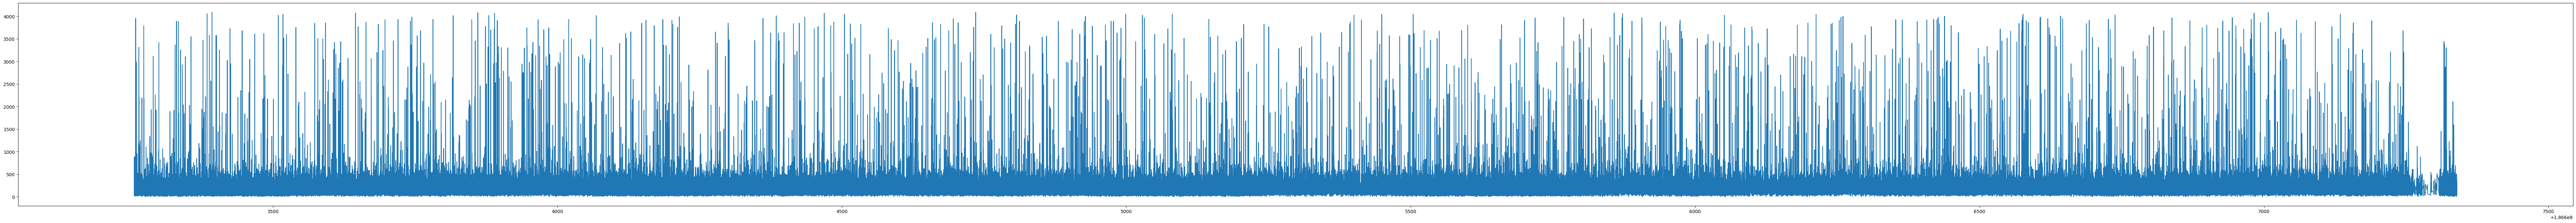

In [178]:
plt.figure(figsize=(100,8))

plt.plot(data["TIME"], data["PI"])

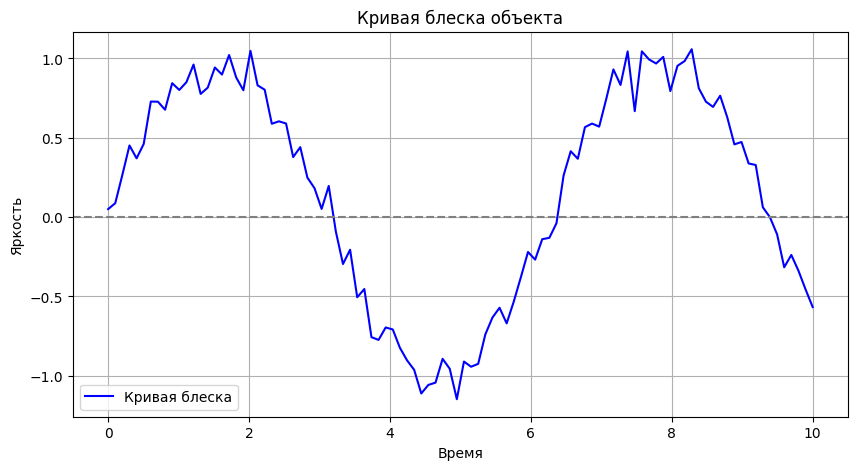

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация синтетических данных
np.random.seed(42)
time = np.linspace(0, 10, 100)  # Время от 0 до 10 с 100 точками
brightness = np.sin(time) + np.random.normal(0, 0.1, size=time.shape)  # Синусоидальная кривая + шум

# Построение кривой блеска
plt.figure(figsize=(10, 5))
plt.plot(time, brightness, label='Кривая блеска', color='blue')
plt.title('Кривая блеска объекта')
plt.xlabel('Время')
plt.ylabel('Яркость')
plt.axhline(0, color='gray', linestyle='--')  # Линия нуля
plt.legend()
plt.grid()
plt.show()


**Строим кривую блеска**

Кривая блеска -- это заумный термин для зависимости принимаемого **сигнала от времени**.\
В данной задаче вам предлагается нарисовать самый базовый вариант кривой блеска, а именно\
**зависимость от времени числа зарегистрированных событий** от данного пульсара.

Для построения этой зависимости нам снова необходимо построить **гистограмму** *(почему?)*.

В этом задании вам предлагается **самостоятельно подумать**, о какой гистограмме речь,\
и как лучше представить те данные, что у нас есть.

Здесь снова **нет конкретного представления графика**, который я предлагаю, поэтому\
попробуйте подобрать параметры гистограммы и отрисовку на свой вкус.

In [ ]:
# МЕСТО ДЛЯ ВАШЕГО КОДА

In [ ]:
# МЕСТО ДЛЯ КОДА ДЛЯ ВАШИХ ГРАФИКОВ

**ЕСЛИ ОСТАЛОСЬ ВРЕМЯ**

В качестве дополнительного задания попробуйте построить график, который изображает среднее количество отсчетов\
в колечке вокруг центра пульсара.

Эта зависимость часто используется при анализе точечных источников, а именно для оценки того, как их изображение\
размазывается из-за оптики телескопа.

Для этого построения радиального профиля нужно:
1. **Самостоятельно изучите как работает функция** `np.histogram2d()`, ссылка [тут](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html).\
Получите данные по числу отсчетов в каждом пикселе.
2. Для каждого пикселя **вычислите расстояние (в пикселях) от центра изображения** в (500, 500).\
Это можно сделать с использованием функции `np.meshgrid()`, [тык](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html#numpy.meshgrid) или операций с вектор-строками и вектор-столбцами.
3. **Вычислите среднее число отсчетов и среднеквадратичное отклонение в кольцах** вокруг центра\
от 5 до 10 пикселей, от 10 до 15 и т.д.
Для этого я рекомендую воспользоваться свойством с масками для NumPy массивов, которое обсуждалось выше.\
4. **Нарисуйте график** полученного радиального профиля при помощи `plt.errorbar()`.
По оси x нарисуйте значения центра кольца с ошибкой в половину его длины.
По оси y нарисуйте значения среднего числа отсчетов и среднеквадратичного отклонения.


In [ ]:
# МЕСТО ДЛЯ ВАШЕГО КОДА

Это задание ОЧЕНЬ душное, поэтому для него есть шпаргалка с решением в отдельном [ноутбуке](./2_add_task_spoiler.ipynb).